In [1]:
#supplied as per question
#import matplotlib.pyplot as plt
#from patsy import dmatrices

#from sklearn.cross_validation
#import train_test_split from sklearn
#import metrics from
#sklearn.cross_validation
#import cross_val_score 

In [1]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [2]:
#fetching the data
data =sm.datasets.fair.load_pandas().data
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [4]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

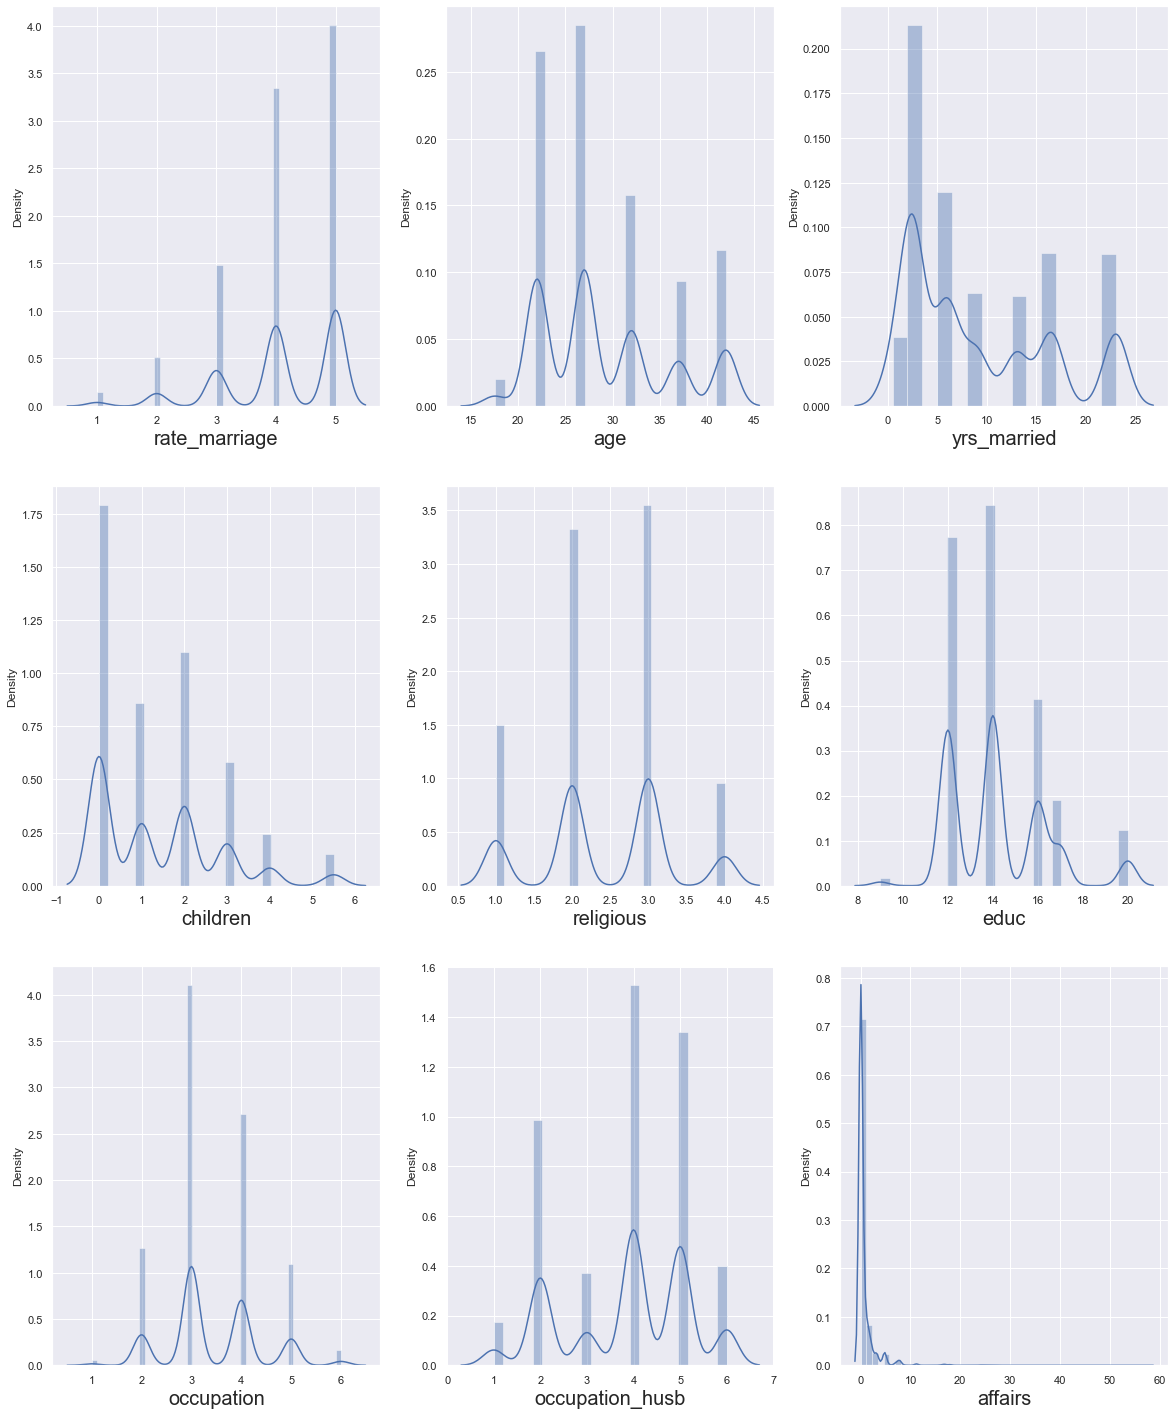

In [5]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [6]:
#how data lools like
for column in data:
    print(column,data[column].unique())

rate_marriage [3. 4. 5. 2. 1.]
age [32.  27.  22.  37.  42.  17.5]
yrs_married [ 9.  13.   2.5 16.5 23.   6.   0.5]
children [3.  0.  4.  1.  5.5 2. ]
religious [3. 1. 2. 4.]
educ [17. 14. 16. 12. 20.  9.]
occupation [2. 3. 5. 4. 1. 6.]
occupation_husb [5. 4. 3. 2. 6. 1.]
affairs [1.11111100e-01 3.23076920e+00 1.39999960e+00 7.27272700e-01
 4.66666600e+00 8.52173500e-01 1.82608600e+00 4.79999920e+00
 1.33333300e+00 3.26666450e+00 2.04166600e+00 4.84848400e-01
 2.00000000e+00 1.36111070e+00 7.83999630e+00 2.54545400e+00
 5.32608700e-01 6.22222200e-01 5.83333300e-01 1.66666600e-01
 6.15384600e-01 1.18787770e+00 1.11999989e+01 2.17777630e+00
 7.00000000e+00 5.21739100e-01 2.12121200e-01 4.00000000e-01
 3.19999980e+00 1.50769140e+00 4.89999960e+00 4.34783000e-02
 7.69231000e-02 2.92173860e+00 2.68799896e+01 6.06061000e-02
 8.88888800e-01 1.52173900e-01 9.42307700e-01 3.88888800e-01
 5.16923050e+00 1.69696900e+00 2.71515080e+00 1.11999998e+01
 7.46666720e+00 4.97777750e+00 2.69230700e-01 7.

In [7]:
#children number must be an integer
data['children']=data['children'].astype(int)

In [8]:
data['children'].unique()

array([3, 0, 4, 1, 5, 2])

In [9]:
data=data.rename(columns={'affairs':'extra_marital_time'})

In [10]:
data.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,extra_marital_time
0,3.0,32.0,9.0,3,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0,1.0,16.0,3.0,5.0,1.333333


In [11]:
#I am creating new column 'affairs' depending upon extra_marital_time.
#affairs 1 suggesting that she has extra-marital time.
new_col=pd.DataFrame(data['extra_marital_time']>0).astype(int)
data['affairs']=new_col

In [12]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,extra_marital_time,affairs
0,3.0,32.0,9.0,3,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1,3.0,14.0,3.0,4.0,0.000000,0


In [13]:
X = data.drop(columns = ['affairs'])
y = data['affairs']

C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ANKDIP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ANKDIP\anacon

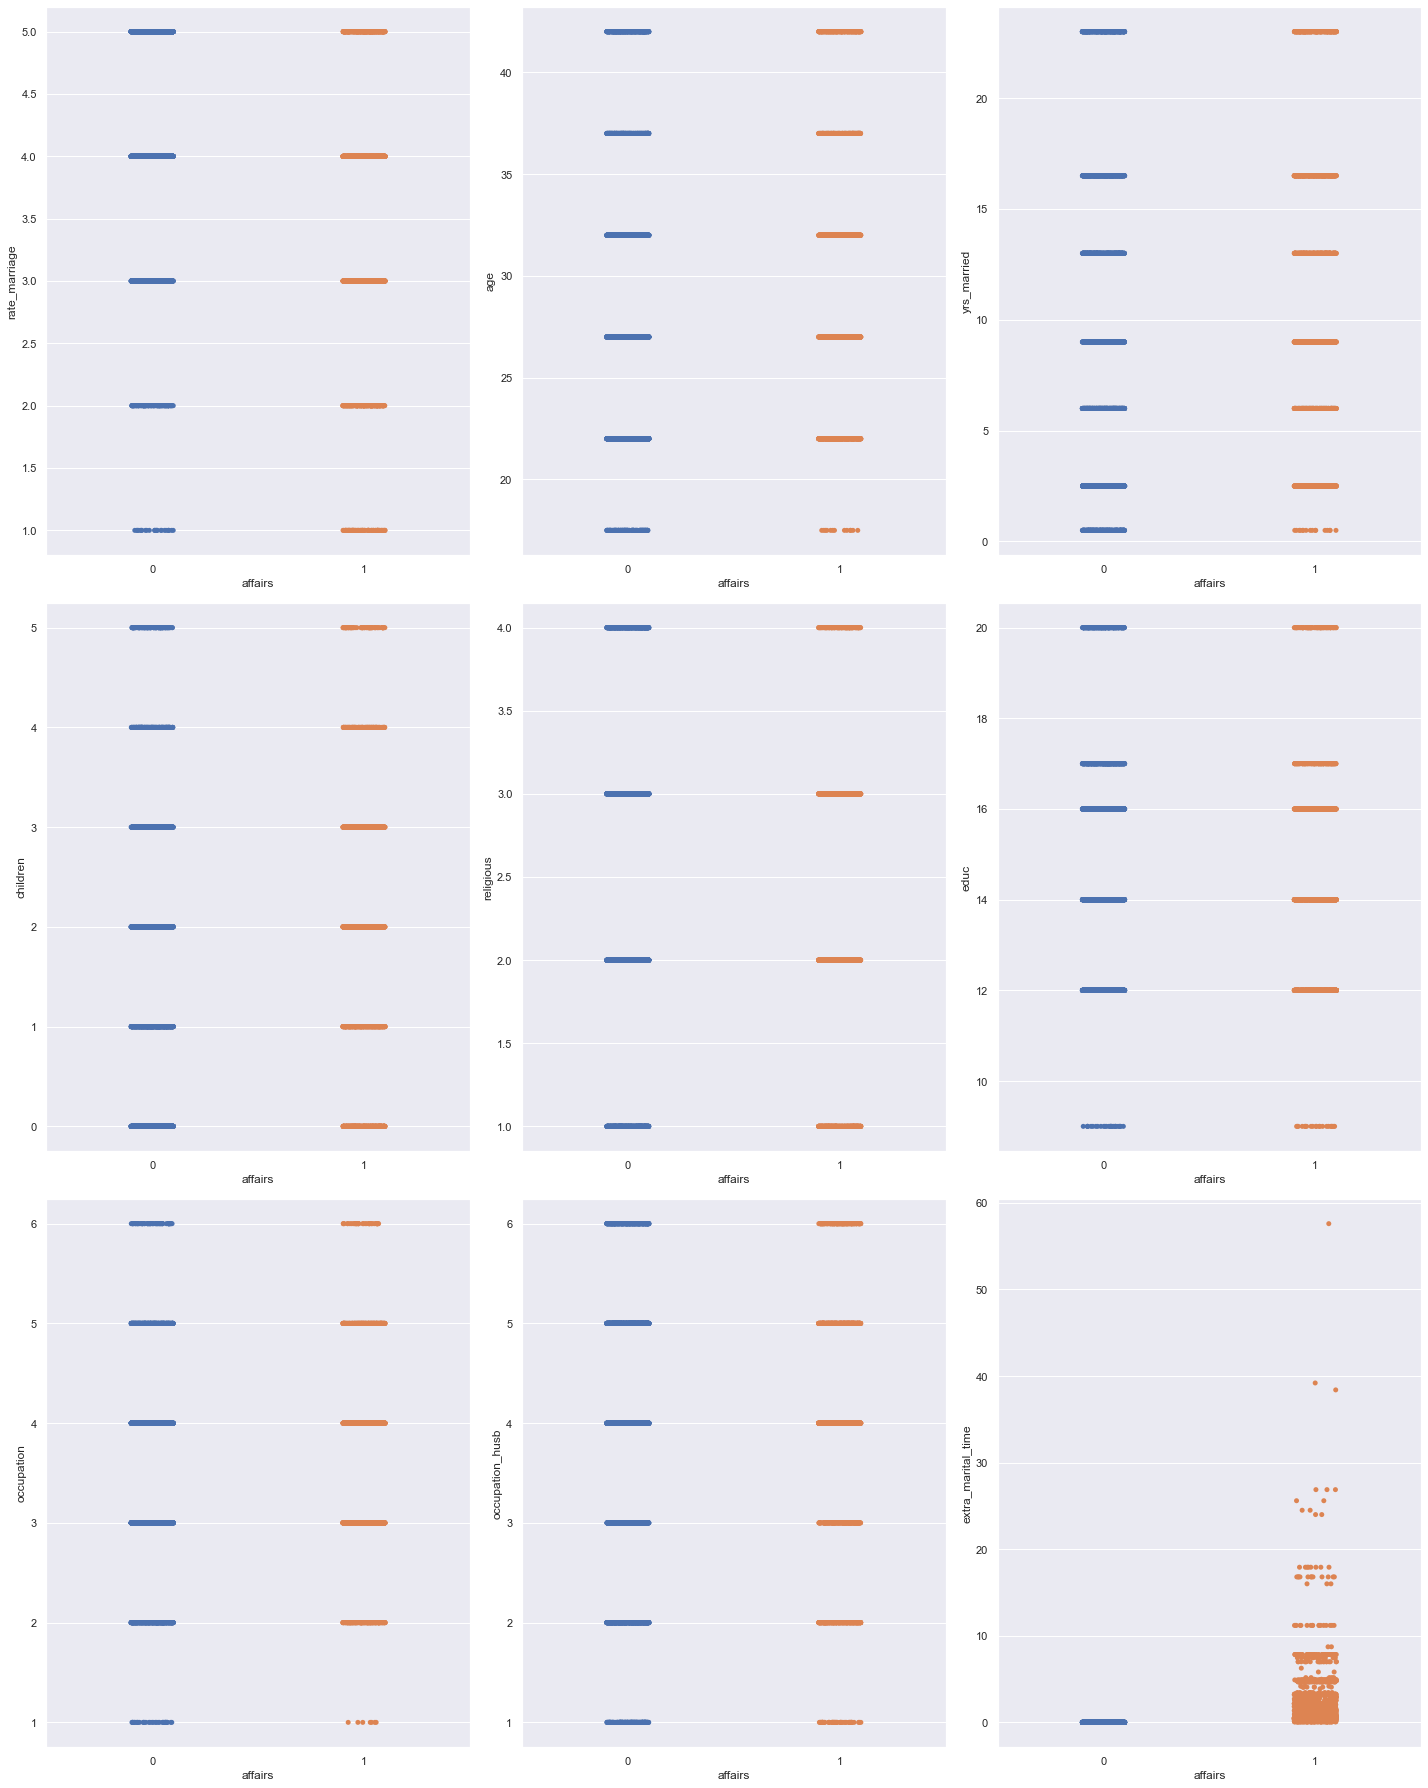

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [15]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [19]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.070677,rate_marriage
1,5.457961,age
2,7.226924,yrs_married
3,2.588758,children
4,1.046866,religious
5,1.296714,educ
6,1.207736,occupation
7,1.082921,occupation_husb
8,1.057975,extra_marital_time


<AxesSubplot:>

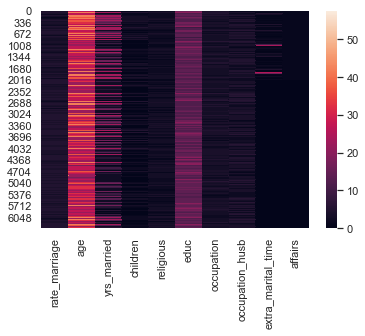

In [18]:
sns.heatmap(data)

In [17]:
data.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,extra_marital_time,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.131083,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.678030,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.778553,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.131083,0.678030,0.778553,1.000000,0.141760,-0.143294,-0.015055,0.088103,-0.070658,0.163212
religious,0.078794,0.136598,0.132683,0.141760,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.143294,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015055,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.088103,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
extra_marital_time,-0.178068,-0.089964,-0.087737,-0.070658,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affairs,-0.331776,0.146519,0.203109,0.163212,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


In [21]:
#Let us drop a column. 
X1=X.drop(columns='age')
X1

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,extra_marital_time
0,3.0,9.0,3,3.0,17.0,2.0,5.0,0.111111
1,3.0,13.0,3,1.0,14.0,3.0,4.0,3.230769
2,4.0,2.5,0,1.0,16.0,3.0,5.0,1.400000
3,4.0,16.5,4,3.0,16.0,5.0,5.0,0.727273
4,5.0,9.0,1,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...
6361,5.0,13.0,2,3.0,17.0,4.0,3.0,0.000000
6362,4.0,13.0,1,1.0,16.0,5.0,5.0,0.000000
6363,5.0,2.5,0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,6.0,1,3.0,14.0,3.0,4.0,0.000000


In [22]:
X1_scaled = scalar.fit_transform(X1)

In [23]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X1_scaled,i) for i in range(X1_scaled.shape[1])]
vif["Features"] = X1.columns

#let's check the values
vif

,vif,Features
0,1.070225,rate_marriage
1,2.598188,yrs_married
2,2.584422,children
3,1.045859,religious
4,1.227118,educ
5,1.205669,occupation
6,1.080176,occupation_husb
7,1.057553,extra_marital_time


In [24]:
# Now all the vif's are less than 5.

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X1_scaled,y, test_size= 0.25, random_state = 355)

In [26]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#Now save our model as a file
import pickle
# Writing different model files to file
with open( 'finalModel.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('standardScaler.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [28]:
# Let's see how our model works on our test data set
y_pred = log_reg.predict(x_test)

In [29]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9610552763819096

In [30]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1084,    0],
       [  62,  446]], dtype=int64)

In [31]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [32]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9610552763819096

In [33]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [34]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9458987783595113

In [35]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9721973094170404

In [36]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9389763779527559

#### ROC

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

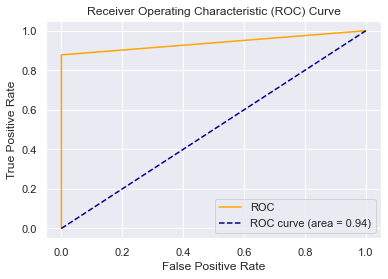

In [38]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [39]:
# Here precision is more important than recall as false positive plays important role than false negative.

In [44]:
#prediction using the saved model
import pickle
filename='finalModel.sav'
loaded_model=pickle.load(open(filename,'rb'))
scaler=pickle.load(open('standardScaler.sav','rb'))

In [53]:
data=[[3.0,13.0,3,1.0,14.0,3.0,4.0,3.230769]] 

In [54]:
a=loaded_model.predict(scaler.transform(data))
a

array([1])